In [171]:
import pandas as pd
import os

# Ruta al archivo CSV en la misma carpeta
ruta_csv = 'Dataframe_Palas_Luis.csv'

# Paso 1: Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Paso 2: Verificar las primeras filas del DataFrame cargado para asegurarse de que todo está bien
print(df.head())

# Si necesitas realizar alguna transformación adicional (como cambiar nombres de columnas, limpieza de datos, etc.)
# Aquí puedes agregar las transformaciones que necesites. Ejemplo de renombrar columnas:
# df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)

# Paso 3: Guardar el DataFrame en un nuevo archivo CSV (si deseas guardar el archivo procesado)
ruta_csv_procesado = 'Dataframe_Palas_Luis_Procesado.csv'
df.to_csv(ruta_csv_procesado, index=False)

# Ver las primeras filas del DataFrame final para confirmar que todo está correcto
print(df.head())

                         Palas    Precio        Marca            Color  \
0              HARLEM EUPHORIA   63,95 €      No data     negro, verde   
1    VARLION LW DIFUSOR W 2021  149,95 €      varlion      negro, rosa   
2  DUNLOP BOOST LITE 2.0 WOMAN  109,00 €  black crown      negro, azul   
3    BLACK CROWN PITON 11 2023   86,95 €       dunlop             rosa   
4           SIUX FURTIVE PRO 2   62,95 €         siux  negro, amarillo   

  Producto      Balance    Nucleo                      Cara   Dureza  \
0    palas  alto, medio  soft eva                   No data  No data   
1    palas         bajo  soft eva                   No data  No data   
2    palas         bajo       eva  carbono, fibra de vidrio  No data   
3    palas         bajo  soft eva           fibra de vidrio   blanda   
4    palas        medio  soft eva           fibra de vidrio  No data   

              Nivel de Juego  Acabado    Forma Superficie Tipo de Juego  \
0     avanzado / competición  No data  No data 

In [172]:
df = df.drop(['Producto', 'Acabado'], axis=1)


In [173]:

df['Precio'] = df['Precio'].apply(lambda x: float(x.replace('€', '').replace(',', '.').strip()))


In [174]:
df.dtypes

Palas              object
Precio            float64
Marca              object
Color              object
Balance            object
Nucleo             object
Cara               object
Dureza             object
Nivel de Juego     object
Forma              object
Superficie         object
Tipo de Juego      object
Jugador            object
dtype: object

In [175]:
df['Tipo de Juego'].unique()

array(['No data', 'control', 'polivalente', 'potencia',
       'control, potencia'], dtype=object)

In [176]:
# Ver los valores únicos en la columna 'Balance'
df['Balance'].unique()

import pandas as pd

# Suponiendo que ya tienes el DataFrame df
# Ejemplo de cómo sería la columna Balance
'''df['Balance'] = pd.DataFrame({
    'Balance': ['alto, medio', 'bajo', 'medio', 'alto', 'medio, bajo', 
                'principiante / intermedio', 'No data', 'avanzado / competición, principiante / intermedio']
})'''

# Aplicamos la función lambda para transformar los valores
df['Balance'] = df['Balance'].apply(lambda x: 
     x if x == 'medio' or x == 'alto' or x == 'bajo'                               
    else 'medio' if 'principiante' in x or 'intermedio' in x 
    else 'alto' if 'avanzado' in x or 'competición' in x 
    else 'No data')

# Ver el resultado
print(df[['Balance']])




     Balance
0    No data
1       bajo
2       bajo
3       bajo
4      medio
..       ...
929    medio
930    medio
931     bajo
932    medio
933    medio

[934 rows x 1 columns]


In [177]:
'''df['Nucleo'] = pd.DataFrame({
    'Nucleo': ['soft eva', 'eva', 'ultrasoft eva', 'hard eva', 'No data',
       'black eva', 'medium eva', 'supersoft eva', 'foam', 'multieva',
       'black eva hr3', 'eva, polietileno', 'black eva hr9',
       'black eva, soft eva']
})'''

df['Nucleo'] = df['Nucleo'].apply(lambda x: 
    x if x == 'soft eva' or x == 'medium eva' or x == 'hard eva' or x == 'foam'
    else 'soft eva' if 'ultrasoft eva' in x or 'black eva, soft eva' in x or 'supersoft eva' in x
    else 'foam' if 'eva, polietileno' in x 
    else 'hard eva' if 'black eva hr9' in x 
    else 'medium eva' if 'black eva hr3' in x or 'eva' in x or 'multieva' in x
    else 'No data'  # Para valores que no coincidan con ninguna condición
)


In [178]:
'''df['Cara'] = pd.DataFrame({
    'Cara': ['No data', 'carbono, fibra de vidrio', 'fibra de vidrio',
       'carbono 12k, fibra de vidrio', 'fibra de carbono',
       'fibra de vidrio, carbono 15k']
})'''


df['Cara'] = df['Cara'].apply(lambda x: 
    x if x == 'fibra de carbono' or x == 'fibra de vidrio' 
    else 'mix' if 'carbono 12k, fibra de vidrio' in x or 'fibra de vidrio, carbono 15k' in x or 'carbono, fibra de vidrio' in x
    else 'No data')

In [179]:
'''df['Dureza'] = pd.DataFrame({
    'Dureza': ['No data', 'blanda', 'media', 'dura', 'media, blanda',
       'dura, media']
})'''

df['Dureza'] = df['Dureza'].apply(lambda x: 
    x if x == 'media' or x == 'blanda' or x == 'dura'
    else 'dura' if 'dura, media'in x 
    else 'blanda' if 'media, blanda' in x 
    else 'No data')



In [180]:
'''df['Nivel de Juego'] = pd.DataFrame({
    'Nivel de Juego': ['avanzado / competición', 'principiante / intermedio',
       'avanzado / competición, profesional', 'profesional',
       'principiante / intermedio, profesional', 'No data',
       'avanzado / competición, principiante / intermedio']
})'''


"df['Nivel de Juego'] = pd.DataFrame({\n    'Nivel de Juego': ['avanzado / competición', 'principiante / intermedio',\n       'avanzado / competición, profesional', 'profesional',\n       'principiante / intermedio, profesional', 'No data',\n       'avanzado / competición, principiante / intermedio']\n})"

In [181]:
df['Nivel de Juego'] = df['Nivel de Juego'].apply(lambda x: 
    x if x == 'No data' else
    'pro' if 'profesional' in x else
    'avanzado' if 'avanzado / competición' in x or 'avanzado / competición, profesional' in x or 'principiante / intermedio, profesional' in x else
    'principiante' if 'principiante / intermedio' in x else
    None 
)

In [182]:
df['Nivel de Juego'].unique()

array(['avanzado', 'principiante', 'pro', 'No data'], dtype=object)

In [183]:
'''df['Tipo de Juego'] = pd.DataFrame({
    'Tipo de Juego': ['No data', 'control', 'polivalente', 'potencia',
       'control, potencia']
})'''
df['Tipo de Juego'] = df['Tipo de Juego'].apply(lambda x:
x if x == 'control' or x == 'polivalente' or x == 'potencia'
else 'polivalente' if 'control, potencia' in x
else 'No data' )


In [184]:
df['Tipo de Juego'].unique()

array(['No data', 'control', 'polivalente', 'potencia'], dtype=object)

In [185]:
df['Jugador'].unique()

array(['hombre, mujer', 'mujer', 'junior', 'hombre', 'No data'],
      dtype=object)

In [186]:
df['Jugador'] = df['Jugador'].apply(lambda x:
x if x == 'hombre' or x == 'mujer' or x == 'junior'
else 'mixta' if 'hombre, mujer' in x
else 'No data')

In [187]:
df.dtypes

Palas              object
Precio            float64
Marca              object
Color              object
Balance            object
Nucleo             object
Cara               object
Dureza             object
Nivel de Juego     object
Forma              object
Superficie         object
Tipo de Juego      object
Jugador            object
dtype: object

In [188]:
def mostrar_variables_columnas(df):
    """
    Muestra las variables únicas presentes en cada columna del DataFrame.

    Args:
    - df (pd.DataFrame): El DataFrame a analizar.

    Returns:
    - dict: Un diccionario donde las claves son los nombres de las columnas y
            los valores son listas de las variables únicas en cada columna.
    """
    variables_por_columna = {}
    for columna in df.columns:
        variables_por_columna[columna] = df[columna].unique().tolist()
        print(f"Columna: {columna}")
        print(f"Variables: {variables_por_columna[columna]}")
        print("-" * 40)
    return variables_por_columna

# Usar la función con tu DataFrame
variables = mostrar_variables_columnas(df)

Columna: Palas
Variables: ['HARLEM EUPHORIA', 'VARLION LW DIFUSOR W 2021', 'DUNLOP BOOST LITE 2.0 WOMAN', 'BLACK CROWN PITON 11 2023', 'SIUX FURTIVE PRO 2', 'ADIDAS ADIPOWER JUNIOR 3.3', 'VARLION BOURNE PRISMA RADIO', 'MYSTICA QUICKSTART HYBRID BLUE 2024', 'SIUX ELECTRA ST3 LITE', 'DUNLOP TITAN 2.0 AMARILLA AZUL', 'RS PADEL COBRA APEX EDITION NEGRO GRIS MUJER', 'SIUX PEGASUS REVOLUTION 2', 'SIUX PEGASUS 1K LIMITED EDITION', 'BLACK CROWN PITON ATTACK PLUS', 'RS COBRA APEX EDITION WOMEN GREEN', 'HEAD SPEED JUNIOR 2023', 'BLACK CROWN SPECIAL SOFT 2023', 'STARVIE AQUILA SPACE SPEED 2.0 2023', 'VARLION BOURNE CARBON 2 PRISMA', 'DUNLOP AERO-STAR LITE', 'DUNLOP NEMESIS CARBON', 'BABOLAT AIR VIPER 2024', 'BLACK CROWN WOLF', 'SIUX ELECTRA ST2 CONTROL RACKET', 'WILSON BELA PRO PADEL 2', 'HEAD CHALLENGE AZUL VERDE', 'NOX AT10 GENIUS 12K BY AGUSTÍN TAPIA EX', 'HEAD CALIBRE ROSA', 'DUNLOP TITAN KILLER 2.0 2024', 'SIUX PEGASUS REVOLUTION 12K', 'HEAD GRAPHENE 360 ALPHA CONTROL', 'HEAD SPEED PRO X 202

In [189]:
import pandas as pd

def labelizar_columnas(df, columnas, label_mapping):
    """
    Labeliza las columnas del DataFrame según un mapeo especificado para cada columna.
    
    Args:
    - df (pd.DataFrame): El DataFrame a procesar.
    - columnas (list): Lista de nombres de columnas a labelizar.
    - label_mapping (dict): Diccionario donde cada clave es el nombre de una columna,
      y el valor es otro diccionario que mapea los valores originales a etiquetas numéricas.
      
    Returns:
    - pd.DataFrame: El DataFrame con las columnas labelizadas.
    """
    df = df.copy()  # Evitar modificar el DataFrame original
    
    for columna in columnas:
        if columna in label_mapping:
            # Añadir 'No data': 0 si no está en el mapeo
            if "No data" not in label_mapping[columna]:
                label_mapping[columna]["No data"] = 0
            # Reemplazar valores según el mapeo
            df[columna] = df[columna].map(label_mapping[columna])
    
    return df

In [190]:
# Especificar el mapeo de etiquetas basado en las variables proporcionadas
label_mapping = {
    "Balance": {"No data": 0, "bajo": 1, "medio": 2, "alto": 3},
    "Nucleo": {"No data": 0, "foam": 1, "medium eva": 2, "hard eva": 3, "soft eva": 4},
    "Cara": {"No data": 0, "fibra de vidrio": 1, "mix": 2, "fibra de carbono": 3},
    "Dureza": {"No data": 0, "blanda": 1, "media": 2, "dura": 3},
    "Nivel de Juego": {"No data": 0, "principiante": 1, "avanzado": 2, "pro": 3},
    "Forma": {"No data": 0, "redonda": 1, "lágrima": 2, "diamante": 3},
    "Superficie": {"No data": 0, "lisa": 1, "rugosa": 2},
    "Tipo de Juego": {"No data": 0, "control": 1, "polivalente": 2, "potencia": 3},
}

In [191]:

# Aplicar la función
df_labelizado = labelizar_columnas(df, df.columns, label_mapping)

print(df_labelizado)


                                     Palas  Precio        Marca  \
0                          HARLEM EUPHORIA   63.95      No data   
1                VARLION LW DIFUSOR W 2021  149.95      varlion   
2              DUNLOP BOOST LITE 2.0 WOMAN  109.00  black crown   
3                BLACK CROWN PITON 11 2023   86.95       dunlop   
4                       SIUX FURTIVE PRO 2   62.95         siux   
..                                     ...     ...          ...   
929            DUNLOP IMPACT PRO HL ORANGE   59.95       dunlop   
930                         VIBOR-A VIPERA   64.95      vibor-a   
931  STARVIE TITANIA KEPLER SPEED 2.0 2023   69.95      No data   
932                       J.HAYBER WARRIOR  192.95      No data   
933              DROP SHOT CONQUEROR 10 BT  146.95    drop shot   

                    Color  Balance  Nucleo  Cara  Dureza  Nivel de Juego  \
0            negro, verde        0       4     0       0               2   
1             negro, rosa        1       4 

In [192]:
def calcular_scores(df, peso_lesion, peso_nivel, score_lesion, score_nivel):
    """
    Calcula los scores de lesión y nivel para cada fila en un DataFrame.

    Args:
    - df (pd.DataFrame): El DataFrame original con las columnas ya labelizadas.
    - peso_lesion (dict): Diccionario con los pesos de lesión para cada columna.
    - peso_nivel (dict): Diccionario con los pesos de nivel para cada columna.
    - score_lesion (dict): Diccionario con los scores de lesión para cada variable de cada columna.
    - score_nivel (dict): Diccionario con los scores de nivel para cada variable de cada columna.

    Returns:
    - pd.DataFrame: Un nuevo DataFrame con las columnas 'score_lesion' y 'score_nivel'.
    """
    df_scored_lesion_palas = df_labelizado.copy()  # Copia del DataFrame original para no modificarlo directamente

    # Inicializamos las columnas de score en 0
    df_scored_lesion_palas["score_lesion"] = 0
    df_scored_lesion_palas["score_nivel"] = 0

    for columna in df.columns:
        if columna in peso_lesion:
            # Multiplicamos los scores de lesión y nivel por sus respectivos pesos
            df_scored_lesion_palas["score_lesion"] += df_scored_lesion_palas[columna].map(score_lesion.get(columna, {})) * peso_lesion[columna]
        if columna in peso_nivel:
            df_scored_lesion_palas["score_nivel"] += df_scored_lesion_palas[columna].map(score_nivel.get(columna, {})) * peso_nivel[columna]

    return df_scored_lesion_palas


# Pesos de lesión para cada columna
peso_lesion = {
    "Balance": 1.5,
    "Nucleo": 1.5,
    "Cara": 1.2,
    "Dureza": 1.5,
    "Nivel de Juego": 1,
    "Forma": 1,
    "Superficie": 1,
    "Tipo de Juego": 1.5,
}

# Pesos de nivel para cada columna
peso_nivel = {
    "Balance": 1.5,
    "Nucleo": 1.2,
    "Cara": 1.0,
    "Dureza": 1.2,
    "Nivel de Juego": 2.0,
    "Forma": 1.5,
    "Superficie": 1.2,
    "Tipo de Juego": 1.5,
}


""" label_mapping = {
    "Balance": {"No data": 0, "bajo": 1, "medio": 2, "alto": 3},
    "Nucleo": {"No data": 0, "foam": 1, "medium eva": 2, "hard eva": 3, "soft eva": 4},
    "Cara": {"No data": 0, "fibra de vidrio": 1, "mix": 2, "fibra de carbono": 3},
    "Dureza": {"No data": 0, "blanda": 1, "media": 2, "dura": 3},
    "Nivel de Juego": {"No data": 0, "principiante": 1, "avanzado": 2, "pro": 3},
    "Forma": {"No data": 0, "redonda": 1, "lágrima": 2, "diamante": 3},
    "Superficie": {"No data": 0, "lisa": 1, "rugosa": 2},
    "Tipo de Juego": {"No data": 0, "control": 1, "polivalente": 2, "potencia": 3},
} """


# Scores de lesión para cada variable en cada columna
score_lesion = {
    "Balance": {0: 0, 1: 1, 2: 2, 3: 3},
    "Nucleo": {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
    "Cara": {0: 0, 1: 1, 2: 2, 3: 3},
    "Dureza": {0: 0, 1: 1, 2: 2, 3: 3},
    "Nivel de Juego": {0: 0, 1: 1, 2: 2, 3: 3},
    "Forma": {0: 0, 1: 1, 2: 2, 3: 3},
    "Superficie": {0: 0, 1: 1, 2: 2},
    "Tipo de Juego": {0: 0, 1: 1, 2: 2, 3: 3},
}

# Scores de nivel para cada variable en cada columna
score_nivel = {
    "Balance": {0: 0, 1: 1, 2: 3, 3: 5},
    "Nucleo": {0: 0, 1: 2, 2: 4, 3: 6, 4: 8},
    "Cara": {0: 0, 1: 2, 2: 4, 3: 6},
    "Dureza": {0: 0, 1: 2, 2: 4, 3: 6},
    "Nivel de Juego": {0: 0, 1: 1, 2: 3, 3: 5},
    "Forma": {0: 0, 1: 2, 2: 4, 3: 6},
    "Superficie": {0: 0, 1: 2, 2: 4},
    "Tipo de Juego": {0: 0, 1: 2, 2: 4, 3: 6},
}

# Calcular scores
df_scored_lesion_palas = calcular_scores(df, peso_lesion, peso_nivel, score_lesion, score_nivel)

print(df_scored_lesion_palas)


                                     Palas  Precio        Marca  \
0                          HARLEM EUPHORIA   63.95      No data   
1                VARLION LW DIFUSOR W 2021  149.95      varlion   
2              DUNLOP BOOST LITE 2.0 WOMAN  109.00  black crown   
3                BLACK CROWN PITON 11 2023   86.95       dunlop   
4                       SIUX FURTIVE PRO 2   62.95         siux   
..                                     ...     ...          ...   
929            DUNLOP IMPACT PRO HL ORANGE   59.95       dunlop   
930                         VIBOR-A VIPERA   64.95      vibor-a   
931  STARVIE TITANIA KEPLER SPEED 2.0 2023   69.95      No data   
932                       J.HAYBER WARRIOR  192.95      No data   
933              DROP SHOT CONQUEROR 10 BT  146.95    drop shot   

                    Color  Balance  Nucleo  Cara  Dureza  Nivel de Juego  \
0            negro, verde        0       4     0       0               2   
1             negro, rosa        1       4 

#### Dataframe con Columnas Escaladas

In [193]:
from sklearn.preprocessing import MinMaxScaler

def escalar_columnas(df, columnas_a_escalar):
    """
    Escala las columnas seleccionadas usando MinMaxScaler (0 a 1).
    
    Args:
    - df (pd.DataFrame): DataFrame con las columnas a escalar.
    - columnas_a_escalar (list): Lista de nombres de las columnas a escalar.
    
    Returns:
    - pd.DataFrame: DataFrame con las columnas escaladas.
    """
    scaler = MinMaxScaler()  # Escalador para normalizar entre 0 y 1
    df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])
    return df

# Lista de columnas a escalar
columnas_a_escalar = ["score_lesion", "score_nivel"]

# Escalar las columnas en df_scored
df_scaled = escalar_columnas(df_scored_lesion_palas, columnas_a_escalar)

print(df_scaled)

                                     Palas  Precio        Marca  \
0                          HARLEM EUPHORIA   63.95      No data   
1                VARLION LW DIFUSOR W 2021  149.95      varlion   
2              DUNLOP BOOST LITE 2.0 WOMAN  109.00  black crown   
3                BLACK CROWN PITON 11 2023   86.95       dunlop   
4                       SIUX FURTIVE PRO 2   62.95         siux   
..                                     ...     ...          ...   
929            DUNLOP IMPACT PRO HL ORANGE   59.95       dunlop   
930                         VIBOR-A VIPERA   64.95      vibor-a   
931  STARVIE TITANIA KEPLER SPEED 2.0 2023   69.95      No data   
932                       J.HAYBER WARRIOR  192.95      No data   
933              DROP SHOT CONQUEROR 10 BT  146.95    drop shot   

                    Color  Balance  Nucleo  Cara  Dureza  Nivel de Juego  \
0            negro, verde        0       4     0       0               2   
1             negro, rosa        1       4 

In [194]:
def mostrar_filas_con_equivalencias(df, indices, label_mapping):
    """
    Función que recibe un DataFrame, una lista de índices y un diccionario de equivalencias (label_mapping).
    Muestra los valores de las columnas especificadas con las equivalencias en texto en lugar de los números de tag.
    """
    # Filtrar las filas seleccionadas
    filas_seleccionadas = df.loc[indices]
    
    # Reemplazar los tags por sus equivalencias para cada columna según label_mapping
    for columna, mapping in label_mapping.items():
        if columna in filas_seleccionadas.columns:
            filas_seleccionadas[columna] = filas_seleccionadas[columna].replace({v: k for k, v in mapping.items()})
    
    return filas_seleccionadas

# Ejemplo de uso con índices seleccionados
indices = [15] # Seleccionar las filas con índice deseado
resultado = mostrar_filas_con_equivalencias(df_scaled, indices, label_mapping)

# Mostrar el resultado
print(resultado)


                     Palas  Precio Marca        Color Balance Nucleo  \
15  HEAD SPEED JUNIOR 2023   49.95  head  negro, gris   medio   foam   

               Cara   Dureza Nivel de Juego    Forma Superficie Tipo de Juego  \
15  fibra de vidrio  No data   principiante  lágrima       lisa   polivalente   

   Jugador  score_lesion  score_nivel  
15  junior      0.488462     0.462523  


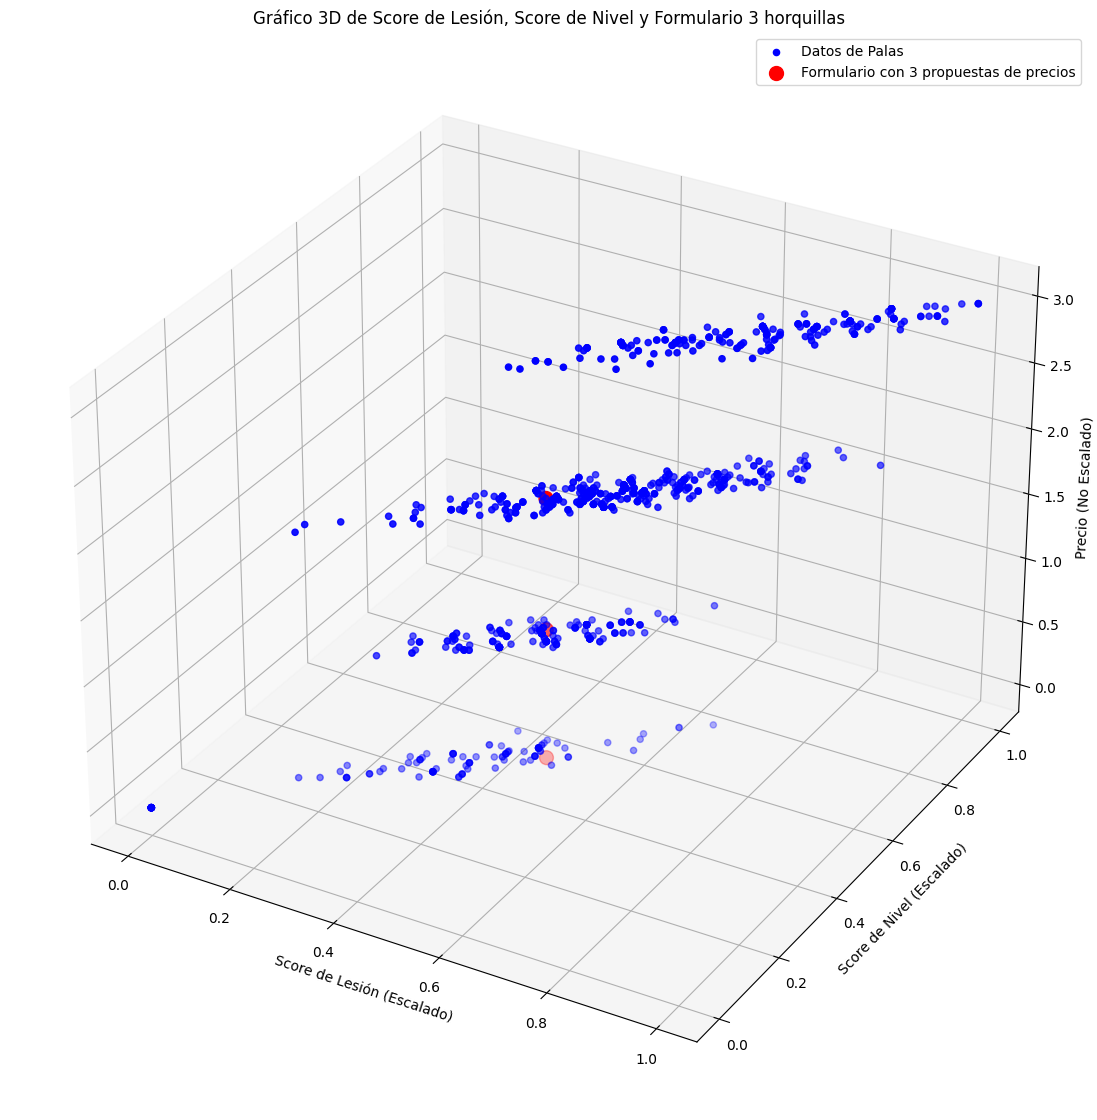

In [195]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random

# Seleccionar una fila aleatoria de df_form
random_row = resultado.sample(1).iloc[0]


# Extraer las coordenadas X e Y de la fila aleatoria
x_random = random_row['score_lesion']
y_random = random_row['score_nivel']

# Valores Z fijos para los tres puntos (Valores que puede adoptar el Bance de la Pala : 0--Bajo , 1 ---Medio , 2---Alto)
z_random = [0, 1, 2]

# Crear figura
fig = plt.figure(figsize=(20, 14))

# Crear un gráfico en 3D
ax = fig.add_subplot(111, projection='3d')

# Definir los valores de cada eje para el DataFrame principal (df_palas)
x = df_scaled['score_lesion']
y = df_scaled['score_nivel']
z = df_scaled['Balance']  # Eje Z para df_palas

# Crear el gráfico de dispersión 3D para df_palas
ax.scatter(x, y, z, color='blue', label='Datos de Palas')

# Crear los puntos adicionales
ax.scatter([x_random] * len(z_random), [y_random] * len(z_random), z_random, 
           color='red', s=100, label='Formulario con 3 propuestas de precios')

# Añadir etiquetas a los ejes
ax.set_xlabel('Score de Lesión (Escalado)')
ax.set_ylabel('Score de Nivel (Escalado)')
ax.set_zlabel('Precio (No Escalado)')

# Título del gráfico
ax.set_title('Gráfico 3D de Score de Lesión, Score de Nivel y Formulario 3 horquillas')

# Añadir leyenda para diferenciar los conjuntos de puntos
ax.legend()

# Mostrar el gráfico
plt.show()

In [208]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd


reference_points = pd.DataFrame({
    'score_lesion': [x_random] * 3,
    'score_nivel': [y_random] * 3,
    'Balance': [1, 2, 3]
})

label_mapping = {
    "Balance": {0: "No data", 1: "bajo", 2: "medio", 3: "alto"},
    "Nucleo": {0: "No data", 1: "foam", 2: "medium eva", 3: "hard eva", 4: "soft eva"},
    "Cara": {0: "No data", 1: "fibra de vidrio", 2: "mix", 3: "fibra de carbono"},
    "Dureza": {0: "No data", 1: "blanda", 2: "media", 3: "dura"},
    "Nivel de Juego": {0: "No data", 1: "principiante", 2: "avanzado", 3: "pro"},
    "Forma": {0: "No data", 1: "redonda", 2: "lágrima", 3: "diamante"},
    "Superficie": {0: "No data", 1: "lisa", 2: "rugosa"},
    "Tipo de Juego": {0: "No data", 1: "control", 2: "polivalente", 3: "potencia"}
}

# Función para entrenar un modelo kNN
def entrenar_knn(df, n_neighbors):
    knn = NearestNeighbors(n_neighbors=n_neighbors)
    knn.fit(df[['score_lesion', 'score_nivel', 'Balance']])
    return knn

# Función para encontrar los vecinos más cercanos
def encontrar_vecinos_mas_cercanos(knn, reference_points, palas_data):
    results = {}
    for index, point in reference_points.iterrows():
        distances, indices = knn.kneighbors([point])
        closest_point = palas_data.iloc[indices[0]]  # Seleccionar solo el vecino más cercano
        results[f'Punto {point["Balance"]}'] = closest_point
    return results

# Función para mostrar filas con equivalencias
def mostrar_filas_con_equivalencias(df, label_mapping):
    """
    Reemplaza los valores numéricos en las columnas del DataFrame por sus equivalentes en texto.
    """
    df_copy = df.copy()  # Trabajar sobre una copia para evitar modificar el original
    for columna, mapping in label_mapping.items():
        if columna in df_copy.columns:
            df_copy[columna] = df_copy[columna].map(mapping).fillna(df_copy[columna]) 
            # `map` aplica el mapeo y `fillna` deja intactos los valores que no están en el mapeo
    return df_copy


# Entrenar el modelo kNN con un vecino
knn_model = entrenar_knn(df_scaled, n_neighbors=1)

# Encontrar los vecinos más cercanos
results = encontrar_vecinos_mas_cercanos(knn_model, reference_points, df_scaled)

# Aplicar las equivalencias y mostrar los resultados
for key, value in results.items():
    value_with_equivalences = mostrar_filas_con_equivalencias(value.copy(), label_mapping)
    print(f"Vecino más cercano a {key}:")
    print(value_with_equivalences[['Palas', 'Balance', 'Dureza', 'Nivel de Juego', 'Forma', 'Tipo de Juego', 'score_lesion', 'score_nivel']], "\n")

Vecino más cercano a Punto 1.0:
                          Palas Balance Dureza Nivel de Juego    Forma  \
598  SIUX TRILOGY CONTROL PRO 4    bajo  media            pro  redonda   

    Tipo de Juego  score_lesion  score_nivel  
598       control      0.576923     0.583181   

Vecino más cercano a Punto 2.0:
                           Palas Balance   Dureza Nivel de Juego    Forma  \
54  BLACK CROWN PITON FURIA 2023   medio  No data            pro  lágrima   

   Tipo de Juego  score_lesion  score_nivel  
54   polivalente      0.519231     0.572212   

Vecino más cercano a Punto 3.0:
                                Palas Balance   Dureza Nivel de Juego  \
884  NOX NERBO WPT LUXURY SERIES 2022    alto  No data            pro   

        Forma Tipo de Juego  score_lesion  score_nivel  
884  diamante       No data      0.596154     0.659963   



c:\Users\Raul\.pyenv\pyenv-win\versions\3.9.0\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\Raul\.pyenv\pyenv-win\versions\3.9.0\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\Raul\.pyenv\pyenv-win\versions\3.9.0\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


##### Creacion de Dataframe con los pesos de la lesion y la suma de todos los pesos de lesion por registro(df_features_score_lesion)

In [197]:
import pandas as pd

# Pesos de lesión para cada columna
peso_lesion = {
    "Balance": 1.5,
    "Nucleo": 1.5,
    "Cara": 1.2,
    "Dureza": 1.5,
    "Nivel de Juego": 1,
    "Forma": 1,
    "Superficie": 1,
    "Tipo de Juego": 1.5,
}

# Scores de lesión para cada variable en cada columna
score_lesion = {
    "Balance": {0: 0, 1: 1, 2: 2, 3: 3},
    "Nucleo": {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
    "Cara": {0: 0, 1: 1, 2: 2, 3: 3},
    "Dureza": {0: 0, 1: 1, 2: 2, 3: 3},
    "Nivel de Juego": {0: 0, 1: 1, 2: 2, 3: 3},
    "Forma": {0: 0, 1: 1, 2: 2, 3: 3},
    "Superficie": {0: 0, 1: 1, 2: 2},
    "Tipo de Juego": {0: 0, 1: 1, 2: 2, 3: 3},
}

def calcular_features_score_lesion(df_labelizado, peso_lesion, score_lesion):
    df_features_score_lesion = pd.DataFrame(index=df_labelizado.index)
    
    for columna in df_labelizado.columns:
        if columna in peso_lesion:
            # Asegúrate de que el mapa devuelva un valor por defecto (como cero) si no se encuentra la clave
            df_features_score_lesion[columna] = df_labelizado[columna].map(score_lesion.get(columna)).fillna(0) * peso_lesion[columna]
    
    df_features_score_lesion['score_lesion'] = df_features_score_lesion.sum(axis=1)
    
    return df_features_score_lesion

# Calcular features_score_lesion usando el DataFrame df_labelizado
df_features_score_lesion = calcular_features_score_lesion(df_labelizado, peso_lesion, score_lesion)
print("Features Score Lesión:")
print(df_features_score_lesion)



# Agregar las columnas 'Palas', 'Precio' y 'Jugador' al principio del DataFrame
df_features_score_lesion = df_labelizado[['Palas', 'Precio', 'Jugador']].join(df_features_score_lesion)

# Mostrar el resultado
print("Features Score Lesión con columnas adicionales al principio:")
print(df_features_score_lesion.head())

Features Score Lesión:
     Balance  Nucleo  Cara  Dureza  Nivel de Juego  Forma  Superficie  \
0        0.0     6.0   0.0     0.0               2      0           1   
1        1.5     6.0   0.0     0.0               2      1           2   
2        1.5     3.0   2.4     0.0               2      1           1   
3        1.5     6.0   1.2     1.5               1      1           2   
4        3.0     6.0   1.2     0.0               2      2           1   
..       ...     ...   ...     ...             ...    ...         ...   
929      3.0     3.0   1.2     0.0               2      0           1   
930      3.0     6.0   1.2     0.0               1      1           2   
931      1.5     6.0   1.2     0.0               2      1           2   
932      3.0     6.0   0.0     3.0               2      1           1   
933      3.0     6.0   0.0     0.0               2      0           2   

     Tipo de Juego  score_lesion  
0              0.0           9.0  
1              0.0          12

In [198]:
import numpy as np

def calcular_influencia(df, peso_lesion):
    influencia = {}
    for columna in peso_lesion.keys():
        correlacion = df[columna].corr(df['score_lesion'])
        influencia[columna] = np.abs(correlacion) * peso_lesion[columna]
    return influencia

influencia_lesion = calcular_influencia(df_features_score_lesion, peso_lesion)
influencia_lesion_sorted = sorted(influencia_lesion.items(), key=lambda x: x[1], reverse=True)


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df_features_score_lesion ya está definido
# Asegúrate de que solo se incluyan columnas numéricas
df_numericas = df_features_score_lesion.select_dtypes(include=[np.number])

# Calcular la correlación entre todas las características numéricas
correlacion_features_filtered = df_numericas.corr()


#### Influencia Lesion Sorted

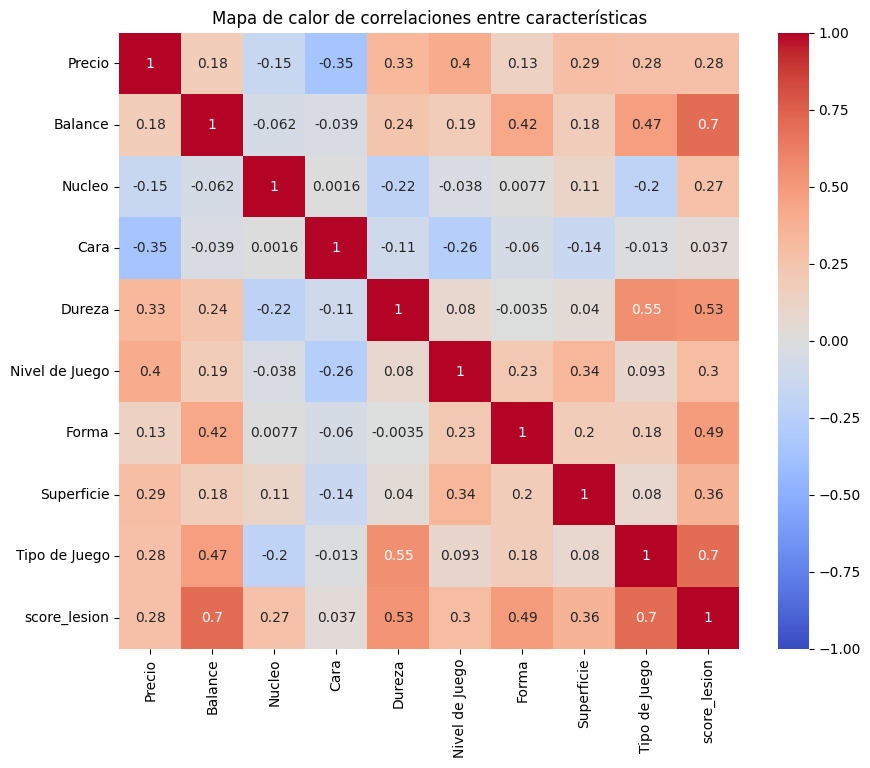

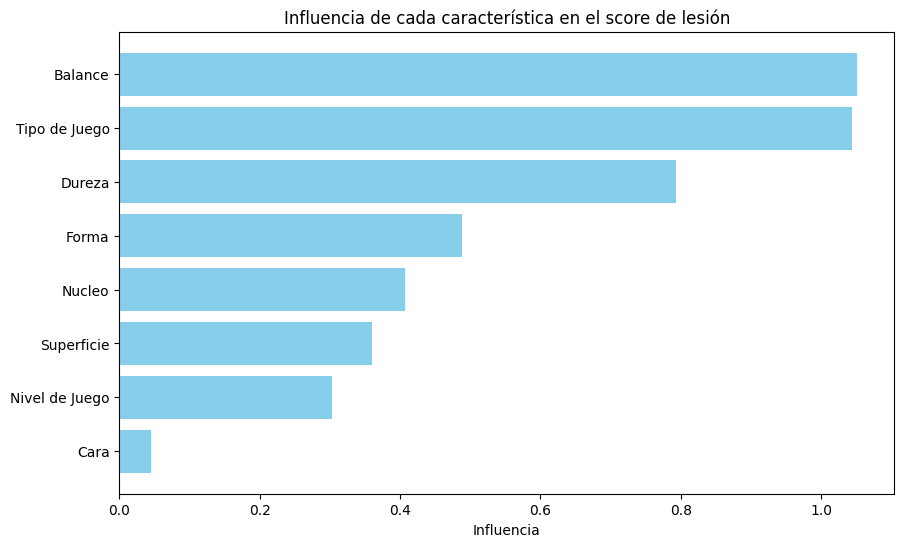

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

def generar_mapa_calor_correlaciones(correlacion_features_filtered):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacion_features_filtered, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Mapa de calor de correlaciones entre características')
    plt.show()

def graficar_influencia_lesion(influencia_lesion_sorted):
    nombres_features, valores_influencia = zip(*influencia_lesion_sorted)
    plt.figure(figsize=(10, 6))
    plt.barh(nombres_features, valores_influencia, color='skyblue')
    plt.xlabel('Influencia')
    plt.title('Influencia de cada característica en el score de lesión')
    plt.gca().invert_yaxis()
    plt.show()

generar_mapa_calor_correlaciones(correlacion_features_filtered)
graficar_influencia_lesion(influencia_lesion_sorted)


##### Creacion de Dataframe con los pesos del NIVEL y la suma de todos los pesos de NIVEL por registro(df_features_score_nivel)

In [201]:
import pandas as pd

# Supongamos que df_labelizado ya está cargado y contiene 923 registros

# Pesos de nivel para cada columna
peso_nivel = {
    "Balance": 1.5,
    "Nucleo": 1.2,
    "Cara": 1.0,
    "Dureza": 1.2,
    "Nivel de Juego": 2.0,
    "Forma": 1.5,
    "Superficie": 1.2,
    "Tipo de Juego": 1.5,
}

# Scores de nivel para cada variable en cada columna
score_nivel = {
    "Balance": {0: 0, 1: 1, 2: 2, 3: 3},
    "Nucleo": {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
    "Cara": {0: 0, 1: 1, 2: 2, 3: 3},
    "Dureza": {0: 0, 1: 1, 2: 2, 3: 3},
    "Nivel de Juego": {0:0 ,1 :1 ,2 :2 ,3 :3 },
    "Forma": {0 :0 ,1 :1 ,2 :2 ,3 :3 },
    "Superficie": {0 :0 ,1 :1 ,2 :2 },
    "Tipo de Juego": {0 :0 ,1 :1 ,2 :2 ,3 :3 },
}

def calcular_features_score_nivel(df_labelizado, peso_nivel, score_nivel):
    df_features_score_nivel = pd.DataFrame(index=df_labelizado.index)
    
    for columna in df_labelizado.columns:
        if columna in peso_nivel:
            # Asegúrate de que el mapa devuelva un valor por defecto (como cero) si no se encuentra la clave
            df_features_score_nivel[columna] = df_labelizado[columna].map(score_nivel.get(columna)).fillna(0) * peso_nivel[columna]
    
    df_features_score_nivel['score_nivel'] = df_features_score_nivel.sum(axis=1)
    
    return df_features_score_nivel

# Calcular features_score_nivel usando el DataFrame df_labelizado
df_features_score_nivel = calcular_features_score_nivel(df_labelizado, peso_nivel, score_nivel)
print("Features Score Nivel:")
print(df_features_score_nivel)


# Agregar las columnas 'Palas', 'Precio' y 'Jugador' al principio del DataFrame
df_features_score_lesion = df_labelizado[['Palas', 'Precio', 'Jugador']].join(df_features_score_nivel)

# Mostrar el resultado
print("Features Score Lesión con columnas adicionales al principio:")
print(df_features_score_nivel.head())

Features Score Nivel:
     Balance  Nucleo  Cara  Dureza  Nivel de Juego  Forma  Superficie  \
0        0.0     4.8   0.0     0.0             4.0    0.0         1.2   
1        1.5     4.8   0.0     0.0             4.0    1.5         2.4   
2        1.5     2.4   2.0     0.0             4.0    1.5         1.2   
3        1.5     4.8   1.0     1.2             2.0    1.5         2.4   
4        3.0     4.8   1.0     0.0             4.0    3.0         1.2   
..       ...     ...   ...     ...             ...    ...         ...   
929      3.0     2.4   1.0     0.0             4.0    0.0         1.2   
930      3.0     4.8   1.0     0.0             2.0    1.5         2.4   
931      1.5     4.8   1.0     0.0             4.0    1.5         2.4   
932      3.0     4.8   0.0     2.4             4.0    1.5         1.2   
933      3.0     4.8   0.0     0.0             4.0    0.0         2.4   

     Tipo de Juego  score_nivel  
0              0.0         10.0  
1              0.0         14.2  

In [202]:
import numpy as np

def calcular_influencia(df, peso_lesion):
    influencia = {}
    for columna in peso_lesion.keys():
        correlacion = df[columna].corr(df['score_nivel'])
        influencia[columna] = np.abs(correlacion) * peso_lesion[columna]
    return influencia

influencia_nivel = calcular_influencia(df_features_score_nivel, peso_lesion)
influencia_nivel_sorted = sorted(influencia_nivel.items(), key=lambda x: x[1], reverse=True)


In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df_features_score_lesion ya está definido
# Asegúrate de que solo se incluyan columnas numéricas
df_numericas = df_features_score_nivel.select_dtypes(include=[np.number])

# Calcular la correlación entre todas las características numéricas
correlacion_features_filtered = df_numericas.corr()


#### Influencia Nivel Sorted

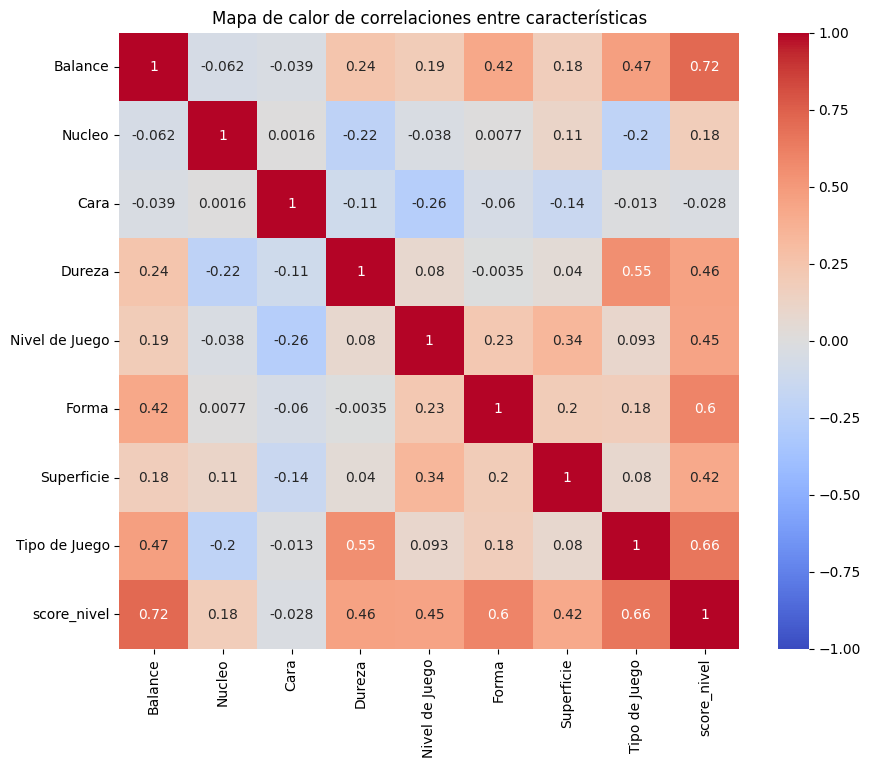

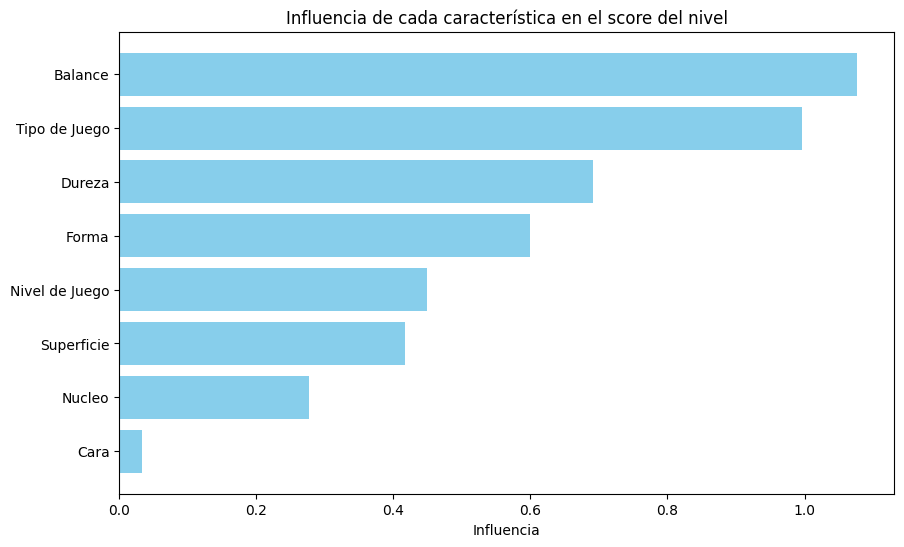

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

def generar_mapa_calor_correlaciones(correlacion_features_filtered):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacion_features_filtered, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Mapa de calor de correlaciones entre características')
    plt.show()

def graficar_influencia_lesion(influencia_nivel_sorted):
    nombres_features, valores_influencia = zip(*influencia_nivel_sorted)
    plt.figure(figsize=(10, 6))
    plt.barh(nombres_features, valores_influencia, color='skyblue')
    plt.xlabel('Influencia')
    plt.title('Influencia de cada característica en el score del nivel')
    plt.gca().invert_yaxis()
    plt.show()

generar_mapa_calor_correlaciones(correlacion_features_filtered)
graficar_influencia_lesion(influencia_nivel_sorted)


#### Sumamos por defecto 

### Influencia del Formulario (Respuestas) en la Lesion

In [205]:
import pandas as pd

# Ruta del archivo CSV
csv_file_path = 'formulario_combinaciones.json.csv'

# Leer el archivo CSV y convertirlo en un DataFrame
try:
    df = pd.read_csv(csv_file_path)
    
    # Mostrar los primeros 20 registros del DataFrame
    print(df.head(20))
except FileNotFoundError:
    print("Error: El archivo no se encontró.")


Error: El archivo no se encontró.


In [206]:
df.head()

,Palas,Precio,Marca,Color,Balance,Nucleo,Cara,Dureza,Nivel de Juego,Forma,Superficie,Tipo de Juego,Jugador
0,HARLEM EUPHORIA,63.95,No data,"negro, verde",No data,soft eva,No data,No data,avanzado,No data,lisa,No data,mixta
1,VARLION LW DIFUSOR W 2021,149.95,varlion,"negro, rosa",bajo,soft eva,No data,No data,avanzado,redonda,rugosa,No data,mixta
2,DUNLOP BOOST LITE 2.0 WOMAN,109.00,black crown,"negro, azul",bajo,medium eva,mix,No data,avanzado,redonda,lisa,control,mixta
3,BLACK CROWN PITON 11 2023,86.95,dunlop,rosa,bajo,soft eva,fibra de vidrio,blanda,principiante,redonda,rugosa,control,mujer
4,SIUX FURTIVE PRO 2,62.95,siux,"negro, amarillo",medio,soft eva,fibra de vidrio,No data,avanzado,lágrima,lisa,No data,mixta


In [207]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame original
df_label = df.copy()

# Lista de columnas categóricas
columnas_categoricas = [
    'Cuantas horas juega a la semana',
    'Indique su peso',
    'Indique su altura',
    'Rango de precio dispuesto a pagar',
    'Indique su lado de juego',
    'Indique su nivel de juego',
    'Tipo de juego',
    'Que tipo de balance te gusta',
    'Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros',
    'Con que frecuencia',
    'Hace cuanto'
]

# Aplicamos LabelEncoder a cada columna categórica
labelencoder = LabelEncoder()

for columna in columnas_categoricas:
    df_label[columna] = labelencoder.fit_transform(df_label[columna].astype(str))  # Convertimos a string para evitar errores con valores nulos

# `df_label` ahora contiene las columnas categóricas transformadas


KeyError: 'Cuantas horas juega a la semana'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear un diccionario para almacenar los mapeos de cada columna
mapeos = {}

# Aplicar LabelEncoder a cada columna categórica
for columna in columnas_categoricas:
    labelencoder = LabelEncoder()
    df_label[columna] = labelencoder.fit_transform(df_label[columna].astype(str))  # Transformar la columna
    mapeos[columna] = dict(enumerate(labelencoder.classes_))  # Guardar el mapeo (número -> categoría)

# Mostrar el mapeo de una columna específica
for columna, mapping in mapeos.items():
    print(f"Columna: {columna}")
    print(mapping)


Columna: Cuantas horas juega a la semana
{0: '0', 1: '1'}
Columna: Indique su peso
{0: '0', 1: '1', 2: '2'}
Columna: Indique su altura
{0: '0', 1: '1', 2: '2'}
Columna: Rango de precio dispuesto a pagar
{0: '0', 1: '1', 2: '2'}
Columna: Indique su lado de juego
{0: '0', 1: '1'}
Columna: Indique su nivel de juego
{0: '0', 1: '1', 2: '2'}
Columna: Tipo de juego
{0: '0', 1: '1'}
Columna: Que tipo de balance te gusta
{0: '0', 1: '1'}
Columna: Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5'}
Columna: Con que frecuencia
{0: '0', 1: '1', 2: '2', 3: '3'}
Columna: Hace cuanto
{0: '0', 1: '1', 2: '2'}


In [ ]:
# Diccionario para guardar los mapeos
mapeos = {}

# Crear el mapeo para cada columna categórica
for columna in columnas_categoricas:
    categorias_originales = df[columna].astype(str)  # Asegúrate de que sean cadenas
    categorias_codificadas = df_label[columna]
    
    # Crear un mapeo único (original -> codificado)
    mapeo = dict(zip(categorias_codificadas, categorias_originales))
    mapeos[columna] = mapeo

# Mostrar el mapeo para cada columna
for columna, mapping in mapeos.items():
    print(f"Columna: {columna}")
    print(mapping)

Columna: Cuantas horas juega a la semana
{1: 'Menos de 3,5 horas', 0: 'Mas de 3.5 horas'}
Columna: Indique su peso
{0: 'Entre 51 y 70 Kg', 1: 'Entre 71 y 90 Kg', 2: 'Más de 91 Kg'}
Columna: Indique su altura
{0: 'Entre 1,51 y 1,70 metros', 1: 'Entre 1,71 y 1,80 metros', 2: 'Mas de 1,80 metros'}
Columna: Rango de precio dispuesto a pagar
{2: 'Menos de 100', 0: 'Entre 100 y 200 ', 1: 'Mas de 200 '}
Columna: Indique su lado de juego
{0: 'Drive', 1: 'Reves'}
Columna: Indique su nivel de juego
{1: 'Iniciacion', 2: 'Intermedio', 0: 'Avanzado'}
Columna: Tipo de juego
{1: 'Ofensivo', 0: 'Defensivo'}
Columna: Que tipo de balance te gusta
{1: 'Medio', 0: 'Alto'}
Columna: Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros
{4: 'Lumbares', 1: 'Epicondilitis', 2: 'Gemelos o fascitis', 0: 'Cervicales', 3: 'Hombros', 5: 'Ninguna'}
Columna: Con que frecuencia
{2: 'Siempre que juego defensivamente', 3: 'Siempre que juego ofensivament

In [ ]:
ponderaciones_lesion = {
    'Cuantas horas juega a la semana': {1: 0, 0: 0.5},
    'Indique su peso': {0: 0, 1: 0, 2: 0.5},
    'Indique su altura': {0: 0, 1: 0, 2: 0.5},
    'Rango de precio dispuesto a pagar': {2: 0, 0: 0, 1: 0},
    'Indique su lado de juego': {0: 0, 1: 0.5},
    'Indique su nivel de juego': {1: 0, 2: 1, 0: 2},
    'Tipo de juego': {1: 0.5, 0: 0},
    'Que tipo de balance te gusta': {1: 0, 0: 0.5},
    'Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros': {4: 0.5, 1: 1, 2: 0.5, 0: 1, 3: 1, 5: 0},
    'Con que frecuencia': {2: 0.5, 3: 0.5, 0: 0.25, 1: 0.15},
    'Hace cuanto': {2: 0.5, 0: 0.25, 1: 0.15}
}


ponderaciones_nivel = {
    'Cuantas horas juega a la semana': {1: 0, 0: 1},
    'Indique su peso': {0: 0, 1: 0, 2: 0},
    'Indique su altura': {0: 0, 1: 0, 2: 0},
    'Rango de precio dispuesto a pagar': {2: 0, 0: 0, 1: 0},
    'Indique su lado de juego': {0: 0, 1: 0.5},
    'Indique su nivel de juego': {1: 0, 2: 1, 0: 2},
    'Tipo de juego': {1: 0.5, 0: 0},
    'Que tipo de balance te gusta': {1: 0, 0: 0.5},
    'Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros': {4: 0, 1: 0, 2: 0, 0: 0, 3: 0, 5: 0},
    'Con que frecuencia': {2: 0, 3: 0, 0: 0, 1: 0},
    'Hace cuanto': {2: 0, 0: 0, 1: 0}
}

In [ ]:
# Crear una copia del DataFrame original para trabajar
df_scored_lesion_formulario = df_label.copy()

# Reemplazar las categorías por sus scores personalizados
for columna, mapping in ponderaciones_lesion.items():
    df_scored_lesion_formulario[columna] = df_scored_lesion_formulario[columna].map(mapping)



df_scored_nivel_formulario = df_label.copy()

for columna, mapping in ponderaciones_nivel.items():
    df_scored_nivel_formulario[columna] = df_scored_nivel_formulario[columna].map(mapping)


# Verifica que los valores sean correctos
print(df_scored_lesion_formulario.head())

print(df_scored_nivel_formulario.head())


# Añadir la nueva columna 'total_scored_formulario' con la suma de las demás columnas
#df_scored_lesion_formulario['total_scored_formulario'] = df_scored_lesion_formulario.sum(axis=1)

# Verifica que los valores sean correctos
#print(df_scored_lesion_formulario.head())

   Cuantas horas juega a la semana  Indique su peso  Indique su altura  \
0                              0.0              0.0                0.0   
1                              0.0              0.0                0.0   
2                              0.0              0.0                0.0   
3                              0.0              0.0                0.0   
4                              0.0              0.0                0.0   

   Rango de precio dispuesto a pagar  Indique su lado de juego  \
0                                  0                       0.0   
1                                  0                       0.0   
2                                  0                       0.0   
3                                  0                       0.0   
4                                  0                       0.0   

   Indique su nivel de juego  Tipo de juego  Que tipo de balance te gusta  \
0                          0            0.5                           0.0   
1   

In [ ]:
print(df_scored_nivel_formulario.columns)

print(df_scored_lesion_formulario.columns)


# Sumar hacia la horizontal (fila por fila)
df_scored_nivel_lesion_formulario = df_scored_nivel_formulario.add(df_scored_lesion_formulario)

# Visualizar el resultado
print(df_scored_nivel_lesion_formulario)

Index(['Cuantas horas juega a la semana', 'Indique su peso',
       'Indique su altura', 'Rango de precio dispuesto a pagar',
       'Indique su lado de juego', 'Indique su nivel de juego',
       'Tipo de juego', 'Que tipo de balance te gusta',
       'Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros',
       'Con que frecuencia', 'Hace cuanto'],
      dtype='object')
Index(['Cuantas horas juega a la semana', 'Indique su peso',
       'Indique su altura', 'Rango de precio dispuesto a pagar',
       'Indique su lado de juego', 'Indique su nivel de juego',
       'Tipo de juego', 'Que tipo de balance te gusta',
       'Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros',
       'Con que frecuencia', 'Hace cuanto'],
      dtype='object')
       Cuantas horas juega a la semana  Indique su peso  Indique su altura  \
0                               

### Matriz de Correlacion - Ponderaciones Lesion

Mayor correlación:
Pares: ('Cuantas horas juega a la semana', 'Hace cuanto'), Valor: 8.200125355308788e-15

Menor correlación:
Pares: ('Cuantas horas juega a la semana', 'Tipo de juego'), Valor: -7.251834211624252e-15

Estadísticas adicionales:
Correlación media: 3.1140066127742526e-16
Desviación estándar de las correlaciones: 2.594737087221831e-15


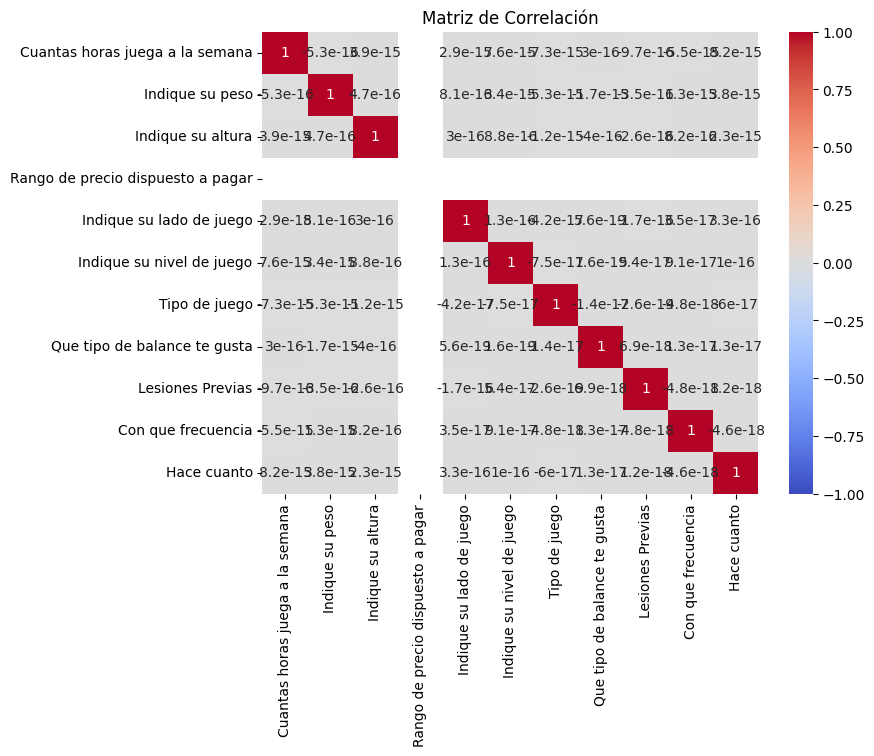

In [ ]:
import pandas as pd
import numpy as np

df_scored_lesion_formulario.rename(columns={'Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros': 'Lesiones Previas'}, inplace=True)

# Calcular la matriz de correlación (ya calculada previamente)
correlation_matrix = df_scored_lesion_formulario.corr()

# Extraer los valores únicos de la matriz de correlación (sin incluir la diagonal)
correlation_values = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Encontrar la mayor y menor correlación
max_corr = correlation_values.max().max()
min_corr = correlation_values.min().min()

# Identificar los pares de columnas con mayor y menor correlación
max_corr_pair = correlation_values.stack().idxmax()
min_corr_pair = correlation_values.stack().idxmin()

# Calcular estadísticas adicionales
mean_corr = correlation_values.stack().mean()
std_corr = correlation_values.stack().std()




# Mostrar resultados
print("Mayor correlación:")
print(f"Pares: {max_corr_pair}, Valor: {max_corr}")
print("\nMenor correlación:")
print(f"Pares: {min_corr_pair}, Valor: {min_corr}")
print("\nEstadísticas adicionales:")
print(f"Correlación media: {mean_corr}")
print(f"Desviación estándar de las correlaciones: {std_corr}")

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

### Matriz de Correlacion - Ponderaciones Nivel

Mayor correlación:
Pares: ('Cuantas horas juega a la semana', 'Indique su nivel de juego'), Valor: 7.584916015117059e-15

Menor correlación:
Pares: ('Cuantas horas juega a la semana', 'Tipo de juego'), Valor: -7.251834211624252e-15

Estadísticas adicionales:
Correlación media: 3.534493209264533e-16
Desviación estándar de las correlaciones: 3.6119634251550796e-15


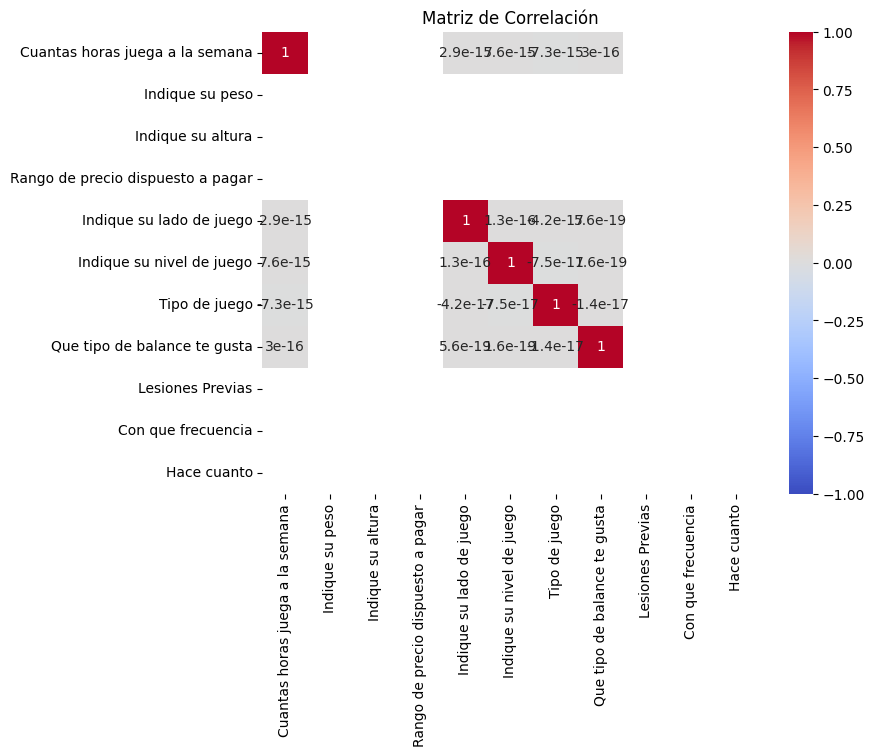

In [ ]:
import pandas as pd
import numpy as np

df_scored_nivel_formulario.rename(columns={'Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros': 'Lesiones Previas'}, inplace=True)

# Calcular la matriz de correlación (ya calculada previamente)
correlation_matrix = df_scored_nivel_formulario.corr()

# Extraer los valores únicos de la matriz de correlación (sin incluir la diagonal)
correlation_values = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Encontrar la mayor y menor correlación
max_corr = correlation_values.max().max()
min_corr = correlation_values.min().min()

# Identificar los pares de columnas con mayor y menor correlación
max_corr_pair = correlation_values.stack().idxmax()
min_corr_pair = correlation_values.stack().idxmin()

# Calcular estadísticas adicionales
mean_corr = correlation_values.stack().mean()
std_corr = correlation_values.stack().std()

# Mostrar resultados
print("Mayor correlación:")
print(f"Pares: {max_corr_pair}, Valor: {max_corr}")
print("\nMenor correlación:")
print(f"Pares: {min_corr_pair}, Valor: {min_corr}")
print("\nEstadísticas adicionales:")
print(f"Correlación media: {mean_corr}")
print(f"Desviación estándar de las correlaciones: {std_corr}")

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

#### Matriz De Correlacion Conjunta de Caracteristicas del Formulario cuando sumamos todas las mismas columnas : Ponderaciones Nivel + Ponderaciones Lesion

Mayor correlación:
Pares: ('Cuantas horas juega a la semana', 'Hace cuanto'), Valor: 8.199812136100263e-15

Menor correlación:
Pares: ('Cuantas horas juega a la semana', 'Tipo de juego'), Valor: -7.267201624803703e-15

Estadísticas adicionales:
Correlación media: 3.8838756448335964e-16
Desviación estándar de las correlaciones: 2.6260887957552648e-15


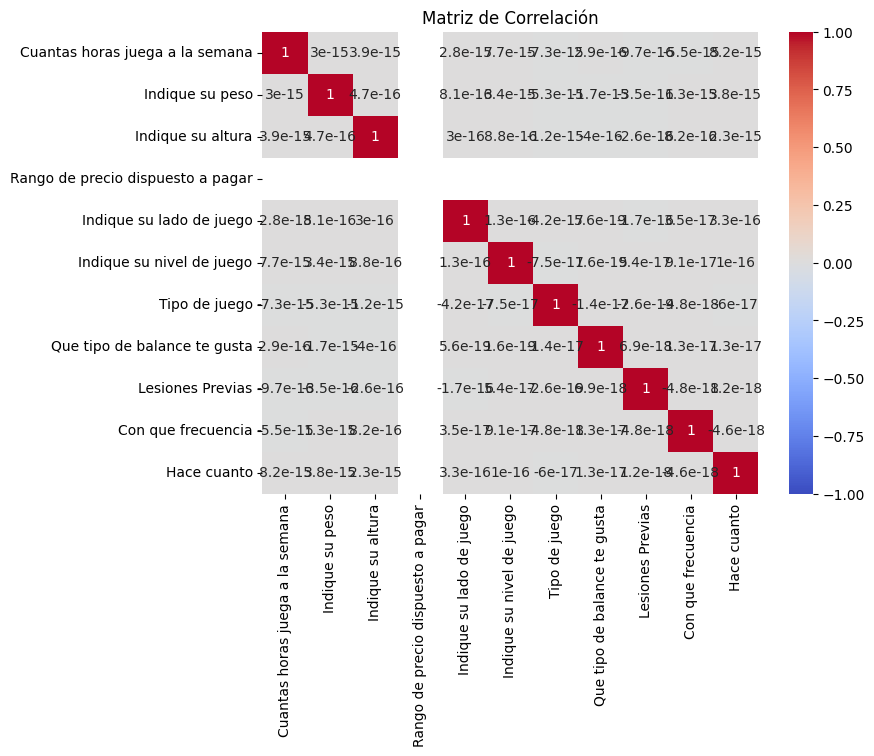

Pares de características altamente correlacionadas:


In [ ]:
import pandas as pd
import numpy as np

df_scored_nivel_lesion_formulario.rename(columns={'Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros': 'Lesiones Previas'}, inplace=True)

# Calcular la matriz de correlación (ya calculada previamente)
correlation_matrix = df_scored_nivel_lesion_formulario.corr()

# Extraer los valores únicos de la matriz de correlación (sin incluir la diagonal)
correlation_values = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Encontrar la mayor y menor correlación
max_corr = correlation_values.max().max()
min_corr = correlation_values.min().min()

# Identificar los pares de columnas con mayor y menor correlación
max_corr_pair = correlation_values.stack().idxmax()
min_corr_pair = correlation_values.stack().idxmin()

# Calcular estadísticas adicionales
mean_corr = correlation_values.stack().mean()
std_corr = correlation_values.stack().std()




# Mostrar resultados
print("Mayor correlación:")
print(f"Pares: {max_corr_pair}, Valor: {max_corr}")
print("\nMenor correlación:")
print(f"Pares: {min_corr_pair}, Valor: {min_corr}")
print("\nEstadísticas adicionales:")
print(f"Correlación media: {mean_corr}")
print(f"Desviación estándar de las correlaciones: {std_corr}")

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


